# Sentiment Analysis

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [1]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [2]:
print(data['train']['pos'][2])

This movie is banned in just about every foreign country I can think of. The Japanese people (?) who star in this must have been really desperate for a job, or we're just friends. Here's the scoop:<br /><br />Three thugs torture the hell out of a helpless woman, they use all kinds of things to eventually kill her, they burn her, kick her, spin here around in a chair (over 200 times!), they use sound torture (by forcing her to listen to a static sound for over 20 hours! It don't sound that bad at all, but it CAN make you go nuts). They throw guts (probably from an animal) at her while shes knocked out, and she freaks when she wakes up. And who can forget the grande finale the GREATEST EYEBALL TORTURE I HAVE EVER SEEN!<br /><br />If you have not heard of these films, and watch one without knowing that it is a simulated snuff film, you will think it is! (just ask Charlie Sheen) This is guaranteed to freak people out and make some sick! Like I said pure underground. Check it out if you are

And one with a negative sentiment:

In [3]:
print(data['train']['neg'][2])

Although this film was made before Dogme emerged as the predominant method of filmmaking, and before digital triumphed over -- strike that. You get the point. This 1991 masterpiece clearly anticipated those developments. Corin Nemec is just outstanding as the ne'er do well author and narrator. The pace is slow, but elegantly so, because the cinematography is so beautiful. Record it the next time its on T.V., because I guarantee you'll never see a better nostalgia rip-off made-for- T.V. movie. Direct-to-video never felt so good!


We can also make a wordcloud visualization of the reviews.

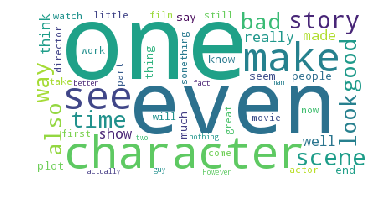

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [5]:
from sklearn.utils import shuffle

def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels
    data_train   = data['train']['pos']   + data['train']['neg']
    labels_train = labels['train']['pos'] + labels['train']['neg']
    
    data_test   = data['test']['pos']   + data['test']['neg']
    labels_test = labels['test']['pos'] + labels['test']['neg']
    
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train, random_state=3)
    
    data_test, labels_test   = shuffle(data_test, labels_test, random_state=3)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [6]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
#nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

In [7]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem

    # Return final list of words
    
    #1- remove HTML tags
    soup   = BeautifulSoup(review, "html5lib")
    review = soup.get_text()
    
    #2 remove punctuations and none-letters
    review = re.sub(r"[^a-zA-z0-9]", " ", review)
    
    #3- lower case
    review = review.lower()
    
    #4- tokenize
    words = review.split()
    
    #5- remove stop words
    words = [w.strip() for w in words if w not in stopwords.words("english")]
    
    #6- stem
    words = [stemmer.stem(w) for w in words]
    
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [8]:
import nltk

print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.2.5.


In [9]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
"The Lady from Shanghai" is well known as one of Hollywood's most troubled productions. Welles' original cut was taken away by the producers and cut to ribbons. This made the already muddled mystery story even more difficult to keep track of. They post dubbed a good amount of his dialog because of the density of the Irish accent, and the dubbing is all too apparent and poorly done. Most disastrous of all, Welles and his on screen and real life leading lady Rita Hayworth were falling apart in their relationship, and their tumultuous chemistry comes through on screen.<br /><br />Fortunately, this is all overcome by just how fantastic Orson Welles' direction is. He makes the film incredibly stylish and atmospheric - every scene just seems to be breathing down your back from the screen. Also, the characters and scenes are so bizarre they border on dreamlike and surreal. This sense of weirdness elevates scenes

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer     = CountVectorizer(preprocessor=lambda x: x, 
                                         tokenizer=lambda x: x, 
                                         max_features=vocabulary_size)
        features_train = vectorizer.fit_transform(words_train).toarray()

        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test  = vectorizer.fit_transform(words_train).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['hugh', 'depend', 'bother', 'premier', 'tarantino', 'margin', 'goe', '1996']

--- Preprocessed words ---
['king', 'queen', 'bloat', 'french', 'drama', 'rambl', 'intermin', 'two', 'hour', 'thirti', 'two', 'minut', 'discern', 'point', 'purpos', 'film', 'featur', 'two', 'stori', 'seem', 'unrel', 'first', 'eventu', 'connect', 'one', 'anoth', 'halfway', 'movi', 'first', 'center', 'around', 'nora', 'struggl', 'variou', 'men', 'life', 'includ', 'elderli', 'father', 'discov', 'day', 'left', 'live', 'stori', 'involv', 'young', 'man', 'name', 'ismael', 'violinist', 'find', 'place', 'unfairli', 'believ', 'mental', 'institut', 'machin', 'unknown', 'third', 'parti', 'travel', 'along', 'separ', 'track', 'awhil', 'two', 'narr', 'strand', 'eventu', 'come', 'togeth', 'learn', 'ismael', 'former', 'lover', 'nora', 'man', 'chosen', 'adopt', 'son', 'earlier', 'tragic', 'relationship', 'bit', 'focu', 'consider', 'amount', 

[7 8 9]


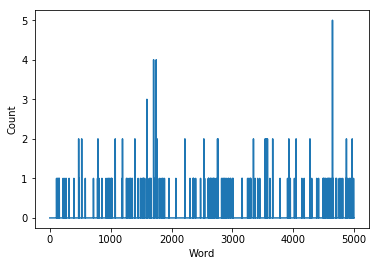

In [11]:
# Plot the BoW feature vector for a training document
x = np.array([[1,2,3],
     [4,5,6],
     [7,8,9]])
print(x[2])

plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [12]:
train_size     = features_train.shape[0] * features_train.shape[1]
non_zero_size  = np.count_nonzero(features_train)
zero_size      = (train_size-non_zero_size)
print('training data size: ', train_size)
print('zero items count: '  , (train_size-non_zero_size))
print('none-zero items count: '  , non_zero_size)

print('zero %{}: '.format( ((zero_size/train_size)*100)) )

training data size:  125000000
zero items count:  122886352
none-zero items count:  2113648
zero %98.3090816: 


#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:

percentage of entries in a BoW feature vector are zero = 98%

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

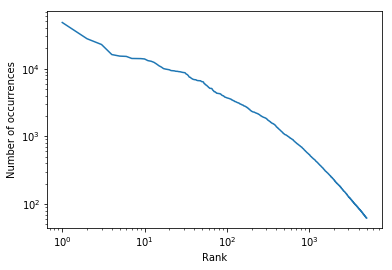

In [13]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

In [14]:
print(sorted_word_freq[:5])

[51694 48187 27738 22798 16191]


#### Question: Zipf's law

What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

#### Answer:

total number of occurrences of the most frequent word = 51694 <br/>
total number of occurrences of the second most frequent word = 48187<br/>

The list does not follow (Zipf's law) exactly, because we pre-processed the data and removed words from it also the vocabulary reduced to max value.

### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [15]:
import sklearn.preprocessing as pr

# TODO: Normalize BoW features in training and test set
features_train = pr.normalize(features_train, copy=False)
features_test  = pr.normalize(features_test, copy=False)

/home/aind2/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [16]:
print("features after normalize: ", features_train[2])

features after normalize:  [ 0.          0.          0.         ...,  0.06097108  0.          0.        ]


## Step 4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [17]:
from sklearn.naive_bayes import GaussianNB

# TODO: Train a Guassian Naive Bayes classifier
clf1 = GaussianNB().fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

[GaussianNB] Accuracy: train = 0.81972, test = 0.81972


In [18]:
#Custom Code: Test GaussianNB 
print("real value: ", labels_train[:100])
#1-predect feature
print("predection: ", clf1.predict(features_train[:100]))

real value:  ['pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos']
predection:  ['pos' 'neg' 'neg' 'pos' 'neg' 'neg' 'pos' 'neg' 'pos' 'neg' 'neg' 'neg'
 'neg' 'neg' 'neg' 'neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'pos' 'pos' 'pos'
 'pos' 'pos' 'pos' 'neg' 'pos' 'pos' 'neg' 'pos' 'pos' 'pos' 'pos' 'neg'
 'pos' 'neg' 'pos' 'neg' 'neg' 'pos' 'pos' 'neg' 'neg'

Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### TODO: Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

#Testing 1: no model selection
#learning rate = [2-10]/trees.

#testing 1: 100 is slowe --> reduce to 80
n_estimators = 80

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)

    # TODO: Classify the data using GradientBoostingClassifier
    clf.fit(X_train, y_train)
    
    # TODO(optional): Perform hyperparameter tuning / model selection
    
    # TODO: Print final training & test accuracy
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(X_train, y_train),
        clf.score(X_test, y_test)))
    
    # Return best classifier model
    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

[GradientBoostingClassifier] Accuracy: train = 0.83916, test = 0.83916


In [20]:
#test range result
print(list([30,50,70,80, 90, 100]))

[30, 50, 70, 80, 90, 100]


In [21]:
from sklearn.grid_search import GridSearchCV

#Testing 2: with model selection
'''reference: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/'''
def classify_gboost2(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf_temp = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
    
    # TODO(optional): Perform hyperparameter tuning / model selection
    esitimator_params = {'n_estimators':list([30,70, 80, 90])}
    gsearch = GridSearchCV(estimator=clf_temp,param_grid=esitimator_params,verbose=2,n_jobs=4)
    
    # TODO: Classify the data using GradientBoostingClassifier
    gsearch.fit(X_train, y_train)
    clf = gsearch.best_estimator_
    
    # TODO: Print final training & test accuracy
    print("best params: ")
    print(gsearch.best_params_)
    print("best score: ")
    print(gsearch.best_score_)
    print("----------------")
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(X_train, y_train),
        clf.score(X_test, y_test)))
    
    # Return best classifier model
    return clf


clf2 = classify_gboost2(features_train, features_test, labels_train, labels_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/aind2/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/aind2/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[CV] n_estimators=30 .................................................
[CV] n_estimators=30 .................................................
[CV] n_estimators=30 .................................................
[CV] n_estimators=70 .................................................
[CV] ........................................ n_estimators=30 - 1.2min
[CV] n_estimators=70 .................................................
[CV] ........................................ n_estimators=30 - 1.2min
[CV] n_estimators=70 .................................................
[CV] ........................................ n_estimators=30 - 1.3min
[CV] n_estimators=80 .................................................
[CV] ........................................ n_estimators=70 - 2.8min
[CV] n_estimators=80 .................................................
[CV] ........................................ n_estimators=70 - 2.8min
[CV] n_estimators=80 .................................................
[CV] .

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  8.7min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  8.7min finished


best params: 
{'n_estimators': 90}
best score: 
0.82952
----------------
[GradientBoostingClassifier] Accuracy: train = 0.84344, test = 0.84344


**Comparison**:<br/>
- GradientBoostingClassifier perfomed better prediction results than GaussianNB.<br/>
- GradientBoostingClassifier more flexible.

### TODO: Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [22]:
# TODO: Write a sample review and set its true sentiment
my_review = "Although the main actor was good in his role the overall movie was boring and doesn't have story"
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'

# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data

#1- clear text and split to words
my_words = list(map(review_to_words, [my_review]))

print('words: ', my_words)

#2- compute bag of words features
vectorizer  = CountVectorizer(vocabulary=vocabulary,preprocessor=lambda x: x,tokenizer=lambda x: x)
features_review = vectorizer.fit_transform(my_words).toarray()

#3- normalize features
features_review = pr.normalize(features_review, copy=False)

print('features shape: ', features_review.shape)

# TODO: Then call your classifier to label it
print("predection 1: ", clf1.predict(features_review)[0] )
print("predection 2: ", clf2.predict(features_review)[0] )
print("predection real: ",true_sentiment)

words:  [['although', 'main', 'actor', 'good', 'role', 'overal', 'movi', 'bore', 'stori']]
features shape:  (1, 5000)
predection 1:  neg
predection 2:  neg
predection real:  neg


/home/aind2/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


## Step 5: Switching gears - RNNs

We just saw how the task of sentiment analysis can be solved via a traditional machine learning approach: BoW + a nonlinear classifier. We now switch gears and use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) that we can use, with the same vocabulary size.

In [17]:
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Using TensorFlow backend.
/home/aind2/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Loaded dataset with 25000 training samples, 25000 test samples


In [18]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[5])
print("--- Label ---")
print(y_train[5])

--- Review ---
[1, 32, 2515, 140, 8, 1827, 9, 11, 61, 652, 4, 118, 1125, 22, 126, 93, 146, 24, 66, 6, 194, 337, 7, 1125, 108, 21, 225, 142, 44, 14, 31, 15, 166, 12, 128, 74, 101, 85, 1125, 22, 207, 110, 4, 228, 9, 389, 17, 9, 4, 354, 7, 2967, 3622, 2, 2, 5, 262, 3662, 1511, 17, 4, 711, 2, 903, 97, 228, 295, 9, 382, 31, 7, 61, 514, 690, 39, 101, 20, 621, 207, 110, 14, 9, 407, 6, 215, 67, 18, 84, 7, 32, 2088]
--- Label ---
1


Notice that the label is an integer (0 for negative, 1 for positive), and the review itself is stored as a sequence of integers. These are word IDs that have been preassigned to individual words. To map them back to the original words, you can use the dictionary returned by `imdb.get_word_index()`.

In [19]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print("--- Review (with words) ---")
print([id2word.get(i, " ") for i in X_train[5]])
print("--- Label ---")
print(y_train[5])

--- Review (with words) ---
['the', 'an', 'universe', 'through', 'in', 'community', 'it', 'this', 'only', 'middle', 'of', 'where', 'speak', 'you', 'your', 'way', 'watching', 'his', 'had', 'is', 'thought', 'completely', 'br', 'speak', 'many', 'not', 'music', 'back', 'has', 'as', 'by', 'for', 'find', 'that', 'still', 'been', 'think', 'because', 'speak', 'you', 'always', 'life', 'of', 'making', 'it', 'small', 'movie', 'it', 'of', 'boring', 'br', 'obsession', 'butt', 'and', 'and', 'to', 'course', 'streisand', 'billy', 'movie', 'of', 'easily', 'and', 'memorable', 'could', 'making', 'american', 'it', 'came', 'by', 'br', 'only', 'starts', '7', 'or', 'think', 'on', 'yourself', 'always', 'life', 'as', 'it', 'itself', 'is', "isn't", 'can', 'but', 'great', 'br', 'an', 'logic']
--- Label ---
1


In [20]:
X_train.shape

(25000,)

Unlike our Bag-of-Words approach, where we simply summarized the counts of each word in a document, this representation essentially retains the entire sequence of words (minus punctuation, stopwords, etc.). This is critical for RNNs to function. But it also means that now the features can be of different lengths!

#### Question: Variable length reviews

What is the maximum review length (in terms of number of words) in the training set? What is the minimum?

#### Answer:

- maximum review length < (vocabulary size = 5000) <br/>
- minimum: no limit


### TODO: Pad sequences

In order to feed this data into your RNN, all input documents must have the same length. Let's limit the maximum review length to `max_words` by truncating longer reviews and padding shorter reviews with a null value (0). You can accomplish this easily using the [`pad_sequences()`](https://keras.io/preprocessing/sequence/#pad_sequences) function in Keras. For now, set `max_words` to 500.

In [21]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test  = sequence.pad_sequences(X_test, maxlen=max_words)

### TODO: Design an RNN model for sentiment analysis

Build your model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that your input is a sequence of words (technically, integer word IDs) of maximum length = `max_words`, and your output is a binary sentiment label (0 or 1).

In [22]:
print(X_train.shape)

(25000, 500)


In [23]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# TODO: Design your model
model = Sequential()
#embedding reference: https://keras.io/layers/embeddings/
model.add(Embedding(vocabulary_size, 128))

model.add(LSTM(128))

model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________
None


#### Question: Architecture and parameters

Briefly describe your neural net architecture. How many model parameters does it have that need to be trained?

#### Answer:

Neural network layers: <br/>
1- Word embedding layer to encode the text for RNN network, it is more effective than one hot encoding for large data.<br/>
2- LSTM layer to learn on text series and extract the features. <br/>
3- Drop layer to avoid over fetting. <br/>
4- Fully connected dense layer to extract the result (1 or 0). <br/>

### TODO: Train and evaluate your model

Now you are ready to train your model. In Keras world, you first need to _compile_ your model by specifying the loss function and optimizer you want to use while training, as well as any evaluation metrics you'd like to measure. Specify the approprate parameters, including at least one metric `'accuracy'`.

In [24]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Once compiled, you can kick off the training process. There are two important training parameters that you have to specify - **batch size** and **number of training epochs**, which together with your model architecture determine the total training time.

Training may take a while, so grab a cup of coffee, or better, go for a hike! If possible, consider using a GPU, as a single training run can take several hours on a CPU.

> **Tip**: You can split off a small portion of the training set to be used for validation during training. This will help monitor the training process and identify potential overfitting. You can supply a validation set to `model.fit()` using its `validation_data` parameter, or just specify `validation_split` - a fraction of the training data for Keras to set aside for this purpose (typically 5-10%). Validation metrics are evaluated once at the end of each epoch.

In [25]:
# TODO: Specify training parameters: batch size and number of epochs
batch_size = 32 #Keras cheatsheet recommend this
num_epochs = 15 

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)
split_index = (int)(X_train.shape[0] * 0.8)
X_train1, X_validate = X_train[:split_index], X_train[split_index:]
y_train1, y_validate = y_train[:split_index], y_train[split_index:]

print('train size: ', X_train1.shape)
print('validate size: ', X_validate.shape)

# TODO: Train your model
model_file = "rnn_model.h5"  # HDF5 file
if os.path.exists(os.path.join(cache_dir, model_file) == False):
    model.fit(X_train1, y_train1,
              batch_size=batch_size, 
              epochs=num_epochs, 
              verbose=1, 
              validation_data=(X_validate, y_validate))

train size:  (20000, 500)
validate size:  (5000, 500)
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 444s 22ms/step - loss: 0.4663 - acc: 0.7790 - val_loss: 0.3967 - val_acc: 0.8270

In [26]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model.save(os.path.join(cache_dir, model_file))

# Later you can load it using keras.models.load_model()
from keras.models import load_model
model = load_model(os.path.join(cache_dir, model_file))

Once you have trained your model, it's time to see how well it performs on unseen test data.

In [27]:
# Evaluate your model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.85948


In [30]:
# Evaluate your model on the train set
scores = model.evaluate(X_train, y_train, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Train accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Train accuracy: 0.96384


#### Question: Comparing RNNs and Traditional Methods

How well does your RNN model perform compared to the BoW + Gradient-Boosted Decision Trees?

#### Answer:

RNN can perform better results than Gradient-Boosted Decision Trees exactly RNNs respect the order of words and can recognize sense ambiguity.

With only 15 epochs the score result was slightly better than (Gradient-Boosted Decision). 
The score can be increased with more epochs.



## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!